# Customer_Analysis_FMCG

### Import Libraries 

In [1]:
# To manipulate dataframe and perform mathematic operations

import numpy as np
import pandas as pd
import scipy
import warnings

# For visualization

import matplotlib.pyplot as plt
import seaborn as ssn
ssn.set()

# Preprocessing

from sklearn.preprocessing import StandardScaler

# Clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# To export Data

import pickle

# To create Logistic Regression Model

from sklearn.linear_model import LogisticRegression

### Import Data

In [2]:
segmentation_df = pd.read_csv("segmentation data.csv", index_col=0)
segmentation_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


## Exploratory Analysis

In [3]:
segmentation_df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [4]:
segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
segmentation_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


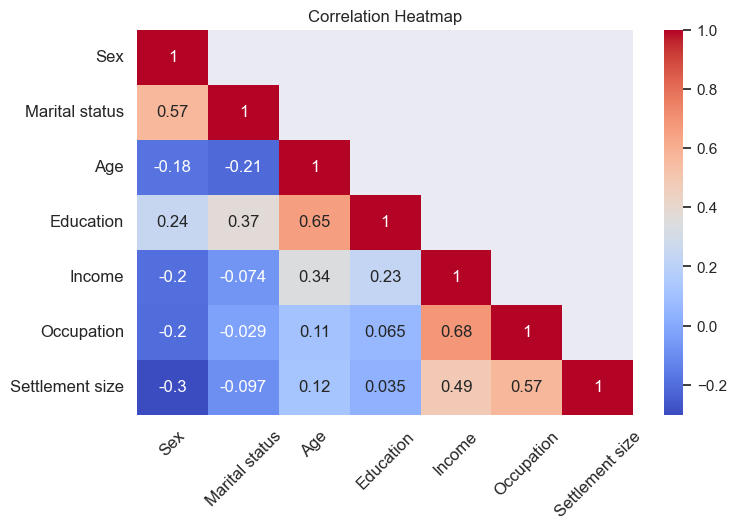

In [7]:
# Correlation estimates through Heatmap

plt.figure(figsize=(8,5))
s = ssn.heatmap(segmentation_df.corr(),
                mask=np.triu(np.ones(len(segmentation_df.corr()))
                             -np.identity(len(segmentation_df.corr()))),
                cmap="coolwarm",
               annot=True)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 45, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

> Income is strongly correlated with Occupation and Settlement_size.

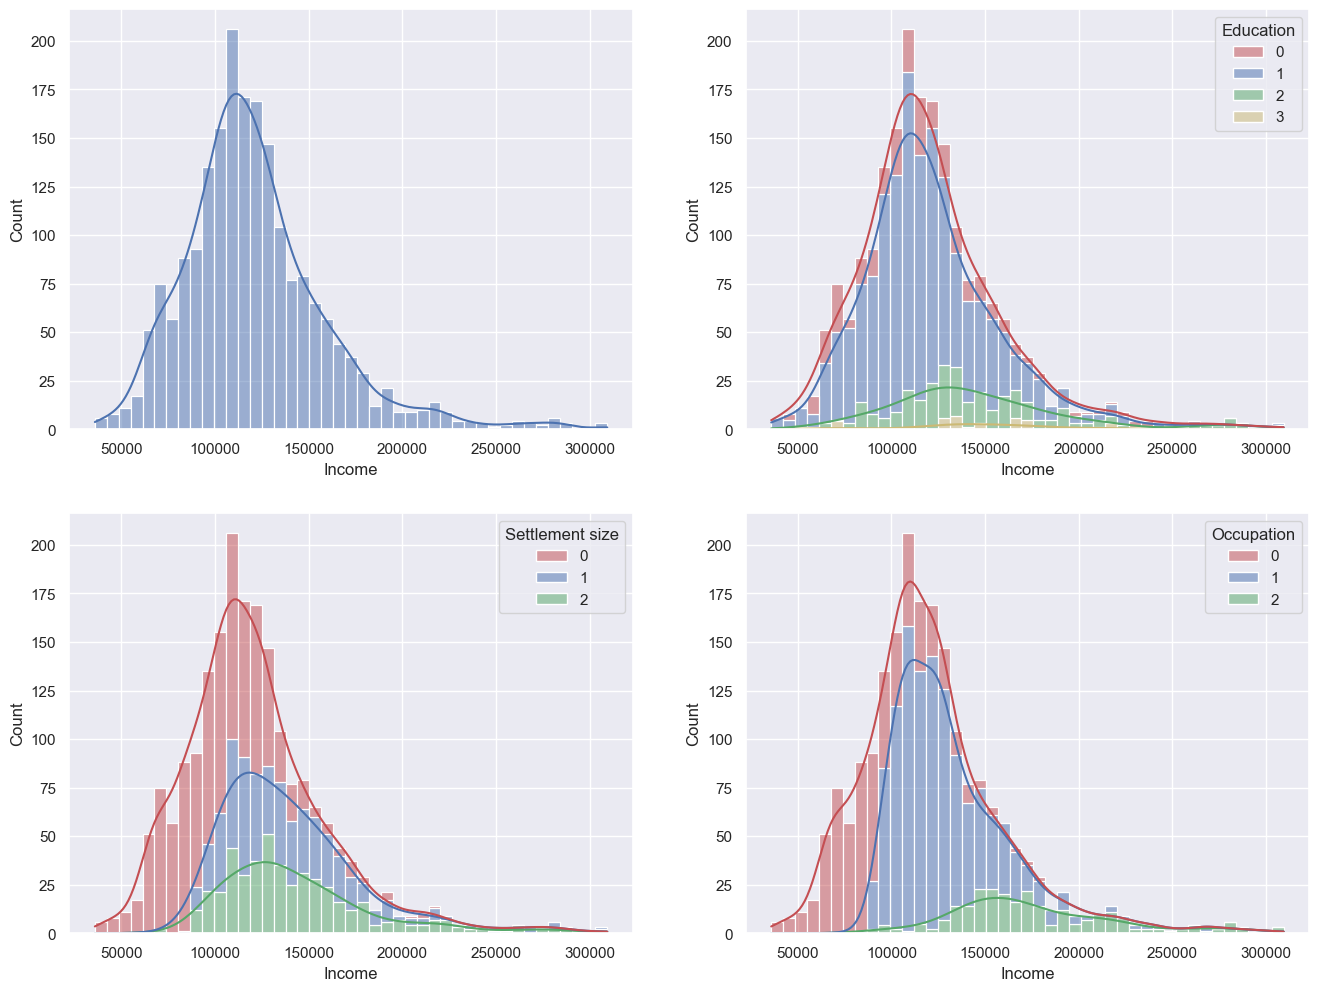

In [8]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
ssn.histplot(data = segmentation_df,x = "Income", kde=True,
             ax=ax[0][0])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Education",
             palette=['r','b','g','y'],multiple="stack", ax=ax[0][1])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Settlement size",
             palette=['r','b','g'],multiple="stack", ax=ax[1][0])

ssn.histplot(data = segmentation_df,x = "Income", kde=True, hue = "Occupation",
             palette=['r','b','g'],multiple="stack", ax=ax[1][1])

plt.plot();

> Most Distribution scewness can be attributed to Occupation.<br>
> Scewness for Settlement size is considerable as well.<br>
> Education is somewhat equally distributed.

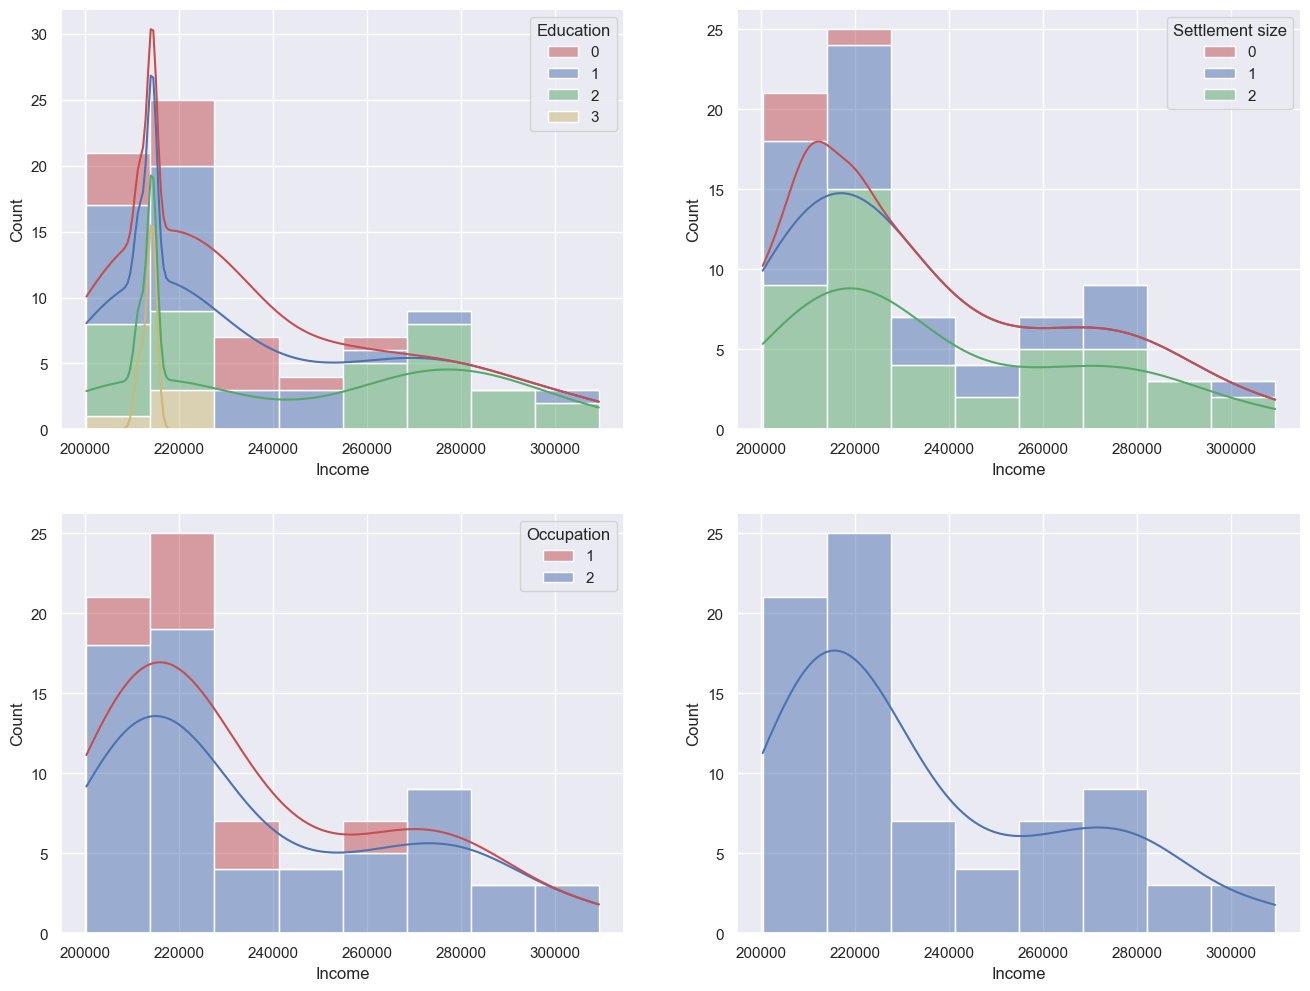

In [9]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

temp  = segmentation_df[segmentation_df["Income"]>200000]

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Education",
             palette=['r','b','g','y'],multiple="stack", ax=ax[0][0])

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Settlement size",
             palette=['r','b','g'], multiple="stack", ax=ax[0][1])

ssn.histplot(data = temp,x = "Income", kde=True, hue = "Occupation",
             palette=['r','b'], multiple="stack", ax=ax[1][0])

ssn.histplot(data = temp,x = "Income", kde=True,
             ax=ax[1][1])
 

plt.plot();

C:\Users\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\software\anacond

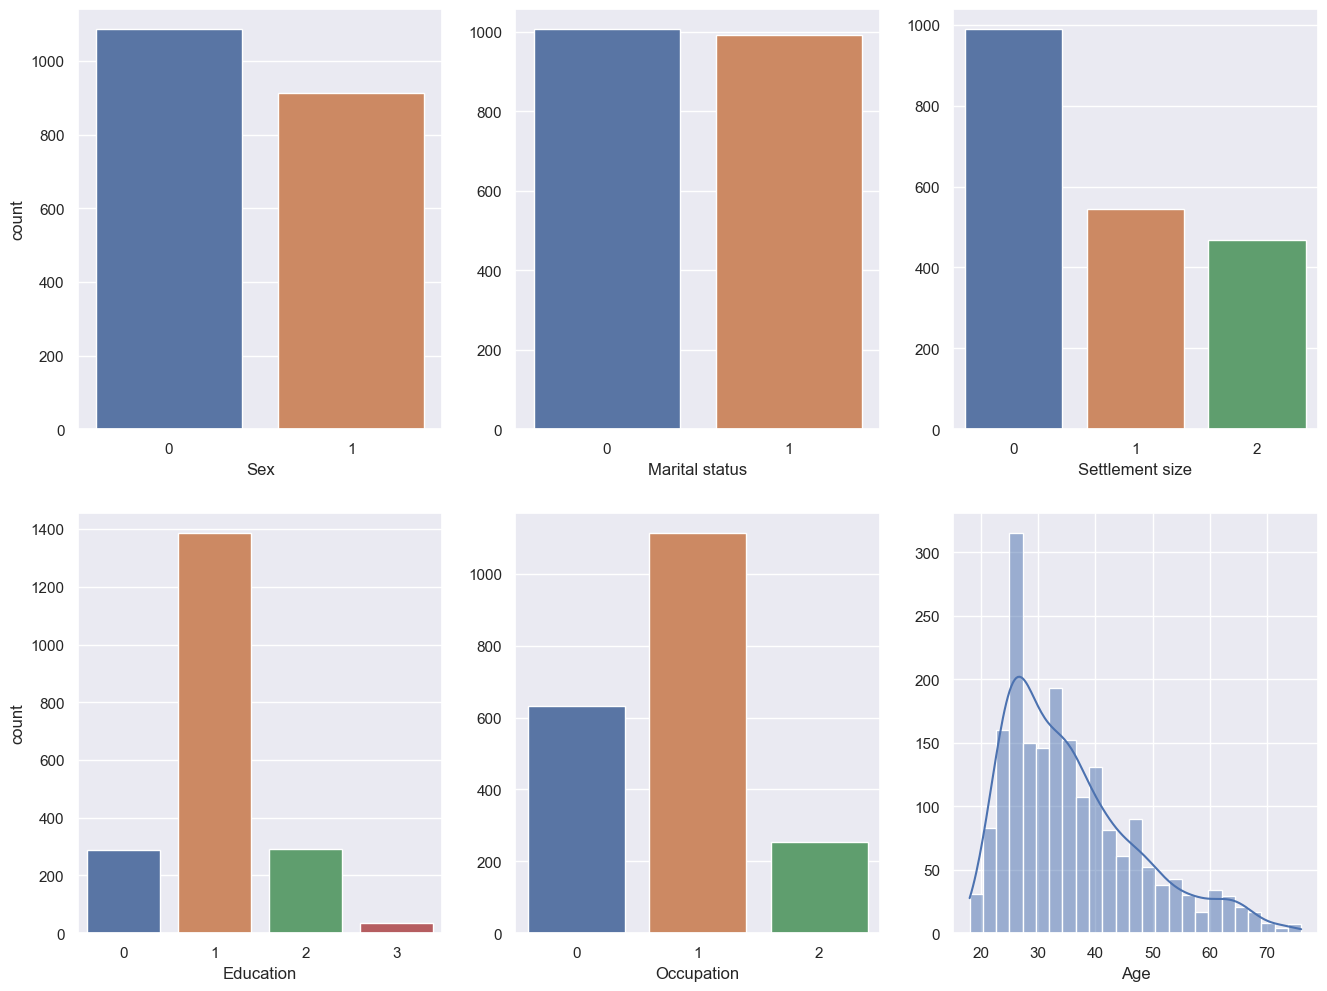

In [10]:
fig, ax = plt.subplots(2,3,figsize=(16,12))

ssn.countplot(segmentation_df["Occupation"], ax=ax[1][1])
ssn.countplot(segmentation_df["Education"], ax=ax[1][0])
ssn.countplot(segmentation_df["Sex"], ax=ax[0][0])
ssn.countplot(segmentation_df["Settlement size"], ax=ax[0][2])
ssn.countplot(segmentation_df["Marital status"], ax=ax[0][1])
ssn.histplot(segmentation_df["Age"],kde=True, ax=ax[1][2])

warnings.filterwarnings(action='ignore')
ax[0][1].set_ylabel("")
ax[1][1].set_ylabel("")
ax[1][2].set_ylabel("")
ax[0][2].set_ylabel("")

plt.plot();

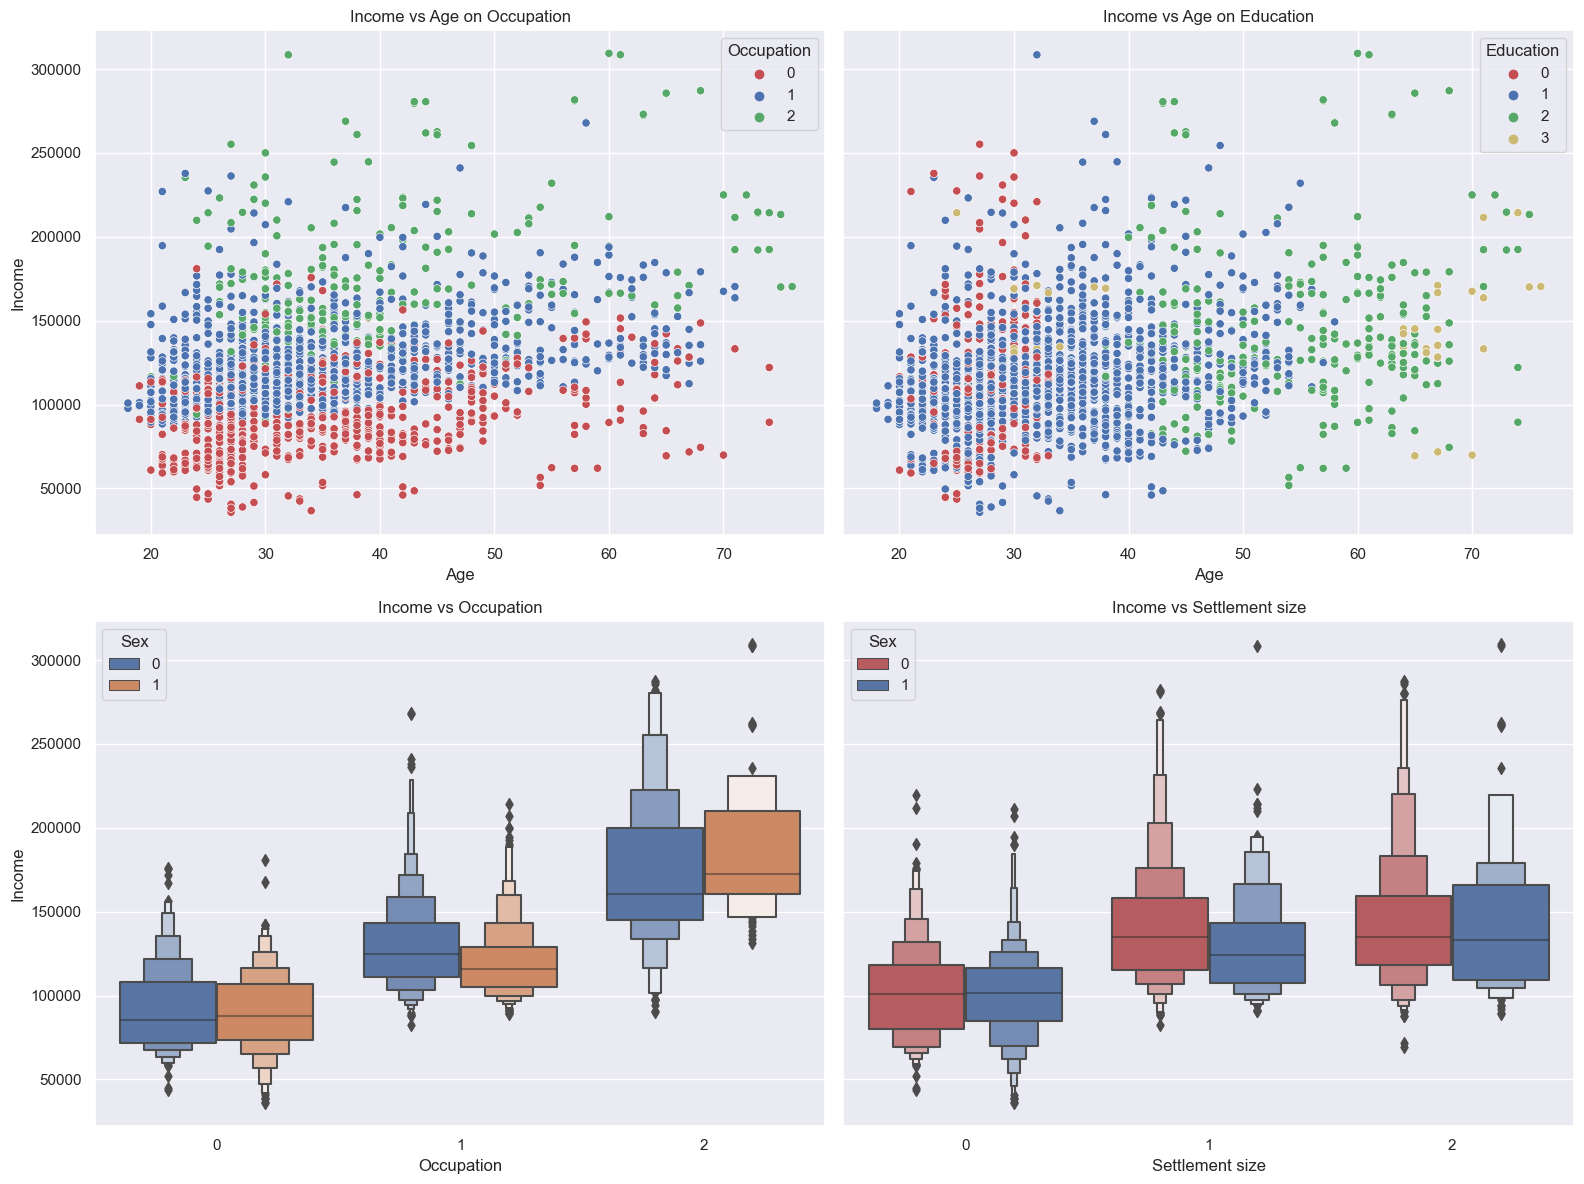

In [11]:
# Scatter plot to identify any obvious clusters

fig, ax = plt.subplots(2,2,figsize=(16,12),sharey=True)


ssn.scatterplot(x=segmentation_df["Age"],
            y=segmentation_df["Income"],
            hue = segmentation_df["Occupation"], palette=['r','b','g'], ax=ax[0][0])

ssn.scatterplot(x=segmentation_df["Age"],
            y=segmentation_df["Income"],
            hue = segmentation_df["Education"], palette=['r','b','g','y'], ax=ax[0][1])

ssn.boxenplot(x = segmentation_df["Occupation"],
            y=segmentation_df["Income"],
            hue =segmentation_df["Sex"],ax=ax[1][0])

ssn.boxenplot(hue=segmentation_df["Sex"],
            y=segmentation_df["Income"],
            x = segmentation_df["Settlement size"], palette=['r','b','g','y'], ax=ax[1][1])

plt.xlabel("Age")
ax[1][0].set_xlabel('Occupation')
ax[1][1].set_xlabel('Settlement size')
ax[1][1].set_ylabel("")
ax[0][0].set_title("Income vs Age on Occupation")
ax[0][1].set_title("Income vs Age on Education")
ax[1][0].set_title("Income vs Occupation")
ax[1][1].set_title("Income vs Settlement size")
ax[0][0].legend(title = "Occupation",loc='upper right')
ax[0][1].legend(title = "Education",loc='upper right')
ax[1][0].legend(title = "Sex",loc='upper left')
ax[1][1].legend(title = "Sex",loc='upper left')
fig.tight_layout() 
plt.show()

### Comments On plots

>Age doesn't seems to justify much variance in Income. However there is a somewhat clear distinction by Income based on Occupation Which is to be expected Higher the income higher the occupation level.

>Customers with age > 55 Years predominately have Higher qualifications <sub>(University degree or above)</sub>. 

>All Unknown Eduction level Customers are below 35 years.

>Income of all customers are right scewed for level 2 Occupation and salaries of Male customers have higher spread For all Occupation and Settlement size .

> Customers in mid-level and big cities have equivalent Income whereas customers from small city earn 50K less on average

## Clustering 

### Standardize

In [12]:
# Apart from Age and Income all variables are ordinal or categorical and scaling those would be illogical
temp = segmentation_df[["Age","Income"]]

In [13]:
scalar = StandardScaler()
temp2 = scalar.fit_transform(temp)
scaled_segmentation_df = segmentation_df.copy()
scaled_segmentation_df[["Age","Income"]] = temp2
scaled_segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,2.653614,2,0.097524,1,2
100000002,1,1,-1.187132,1,0.782654,1,2
100000003,0,0,1.117316,1,-0.833202,0,0
100000004,0,0,0.775916,1,1.328386,1,1
100000005,0,0,1.458716,1,0.736932,1,1


### Hierarichal Clustering

In [14]:
hier_clust = linkage(scaled_segmentation_df, method="ward")

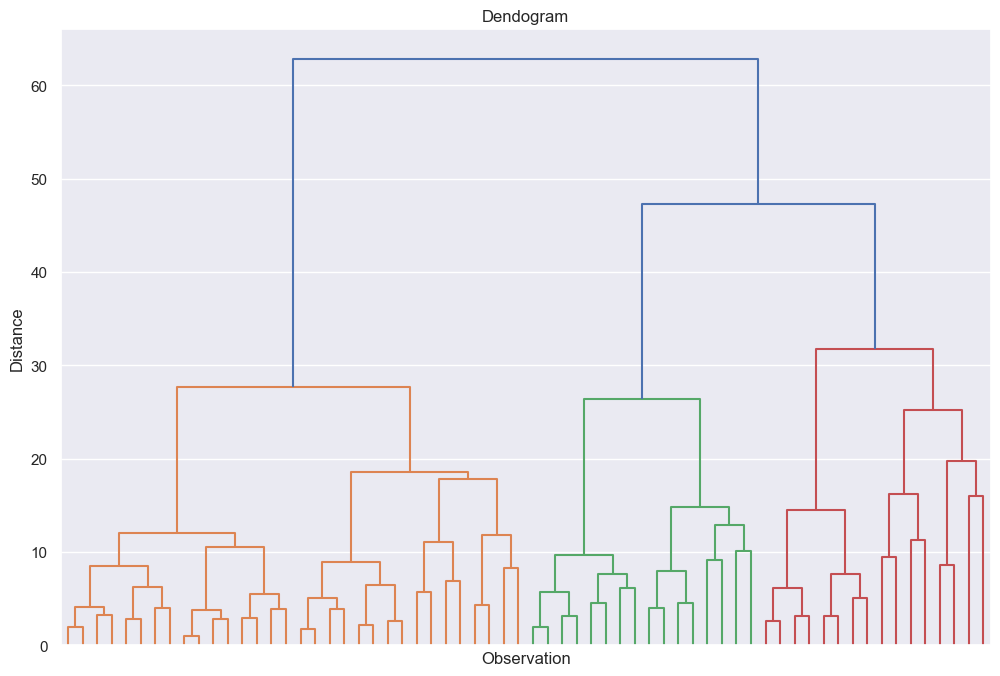

In [15]:
# visualize Dendogram

plt.figure(figsize=(12,8))

plt.title("Dendogram")
plt.xlabel("Observation")
plt.ylabel("Distance")

dendrogram(hier_clust,
          truncate_mode="level",
          p = 5,
          show_leaf_counts= False,
          no_labels=True)

plt.show()

### K-means Clustering

In [16]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,
                    init="k-means++",
                    random_state=42)
    kmeans.fit(scaled_segmentation_df)
    wcss.append(kmeans.inertia_)

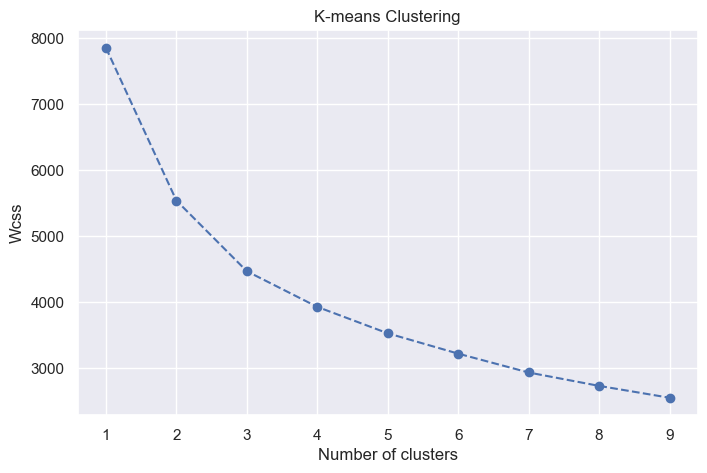

In [17]:
# Plot Wcss Curve to identify optimal number of clusters

plt.figure(figsize=(8,5))
plt.plot(range(1,10),wcss,marker ='o',linestyle ='--')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.title('K-means Clustering')
plt.show()

In [18]:
# As Wcss Elbow is at 3 
kmeans = KMeans(n_clusters=3,
                    init="k-means++",
                    random_state=52)

kmeans.fit(scaled_segmentation_df)

KMeans(n_clusters=3, random_state=52)

In [19]:
### Results

df_seg_kmeans = segmentation_df.copy()

df_seg_kmeans["Segment K-means"] = kmeans.labels_

In [20]:
df_segm_analysis = df_seg_kmeans.groupby(["Segment K-means"]).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977
1,0.252555,0.404380,31.973723,0.808759,137358.251095,1.210219,1.481752
2,0.637591,0.569055,31.577362,0.919003,97063.633437,0.425753,0.095535


In [21]:
segmentation_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


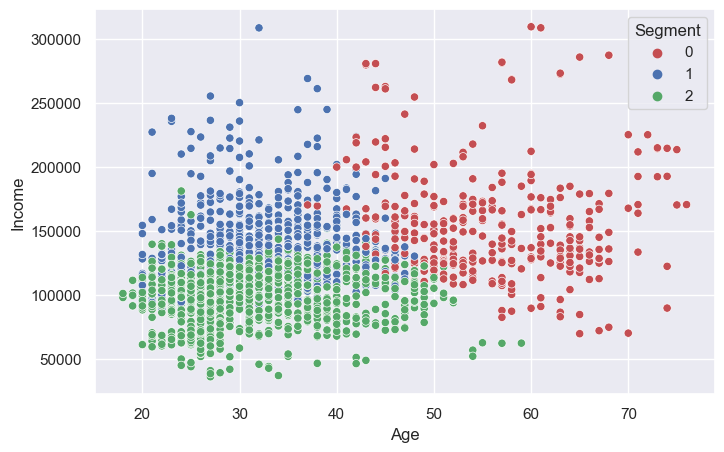

In [22]:
temp_plot = segmentation_df.copy()
temp_plot["Segment"] = kmeans.predict(scaled_segmentation_df) 

fig, ax = plt.subplots(figsize=(8,5))


ssn.scatterplot(x=temp_plot["Age"],
            y=temp_plot["Income"],
            hue = temp_plot["Segment"], palette=['r','b','g'])
plt.plot();

> Judging by this plot Model did pretty well <br>
> Considering there are 7 features and we only used 2 for plot

In [23]:
# Mean values of each Feature for each segment
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977
1,0.252555,0.404380,31.973723,0.808759,137358.251095,1.210219,1.481752
2,0.637591,0.569055,31.577362,0.919003,97063.633437,0.425753,0.095535


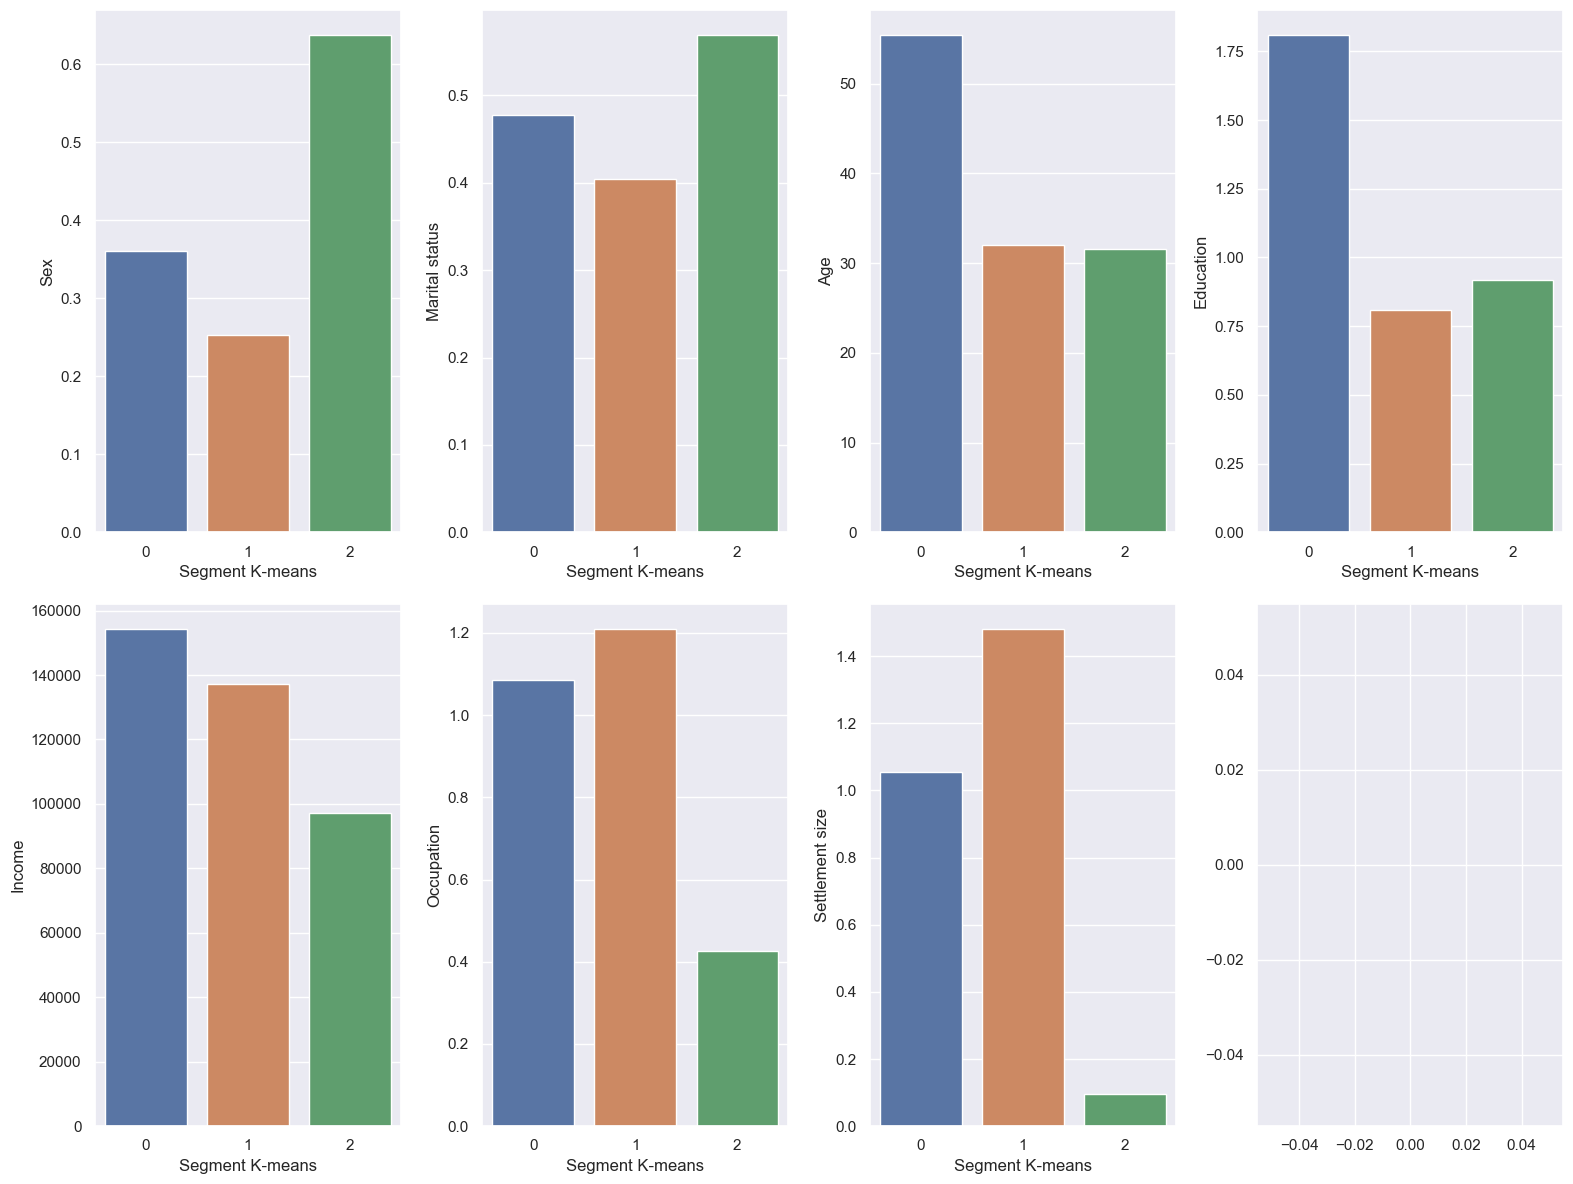

In [24]:
hue = df_segm_analysis.index
fig, ax = plt.subplots(2,4,figsize=(16,12))
j = 0
k = 0
l = 0
for i in df_segm_analysis.columns:
    if k<=3:
        ssn.barplot(x = df_segm_analysis.index, y = df_segm_analysis[i], ax=ax[j][k])
        k+=1
    else:
        j = 1
        ssn.barplot(x = df_segm_analysis.index, y = df_segm_analysis[i], ax=ax[j][l])
        l+=1

fig.tight_layout()
plt.plot();

> 0 : Entrepreneurs : Relatively young group, low Education yet highest Income and live in Major cities

> 1 : Well-off : Oldest group, Highly educated, High Income and live in mid or major cities

> 2 : Workers : Low education, low income, in middle age and live in small cities, Mostly male and predominantly married.

In [25]:
df_segm_analysis.rename({0:'Entrepreneurs',
                         1:'well-off',
                         2:'Workers'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
Entrepreneurs,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977
well-off,0.252555,0.404380,31.973723,0.808759,137358.251095,1.210219,1.481752
Workers,0.637591,0.569055,31.577362,0.919003,97063.633437,0.425753,0.095535


In [26]:
# Compute Size and proportions of four clusters

df_segm_analysis['N_Obs'] = df_seg_kmeans[["Segment K-means","Sex"]].groupby(['Segment K-means']).count()
df_segm_analysis['Obs_prop'] = df_segm_analysis['N_Obs'] / df_segm_analysis['N_Obs'].sum()

In [27]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Obs_prop
Segment K-means,,,,,,,,,
0,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977,352,0.1760
1,0.252555,0.404380,31.973723,0.808759,137358.251095,1.210219,1.481752,685,0.3425
2,0.637591,0.569055,31.577362,0.919003,97063.633437,0.425753,0.095535,963,0.4815


In [28]:
df_segm_analysis.rename({0:'Entrepreneurs',
                         1:'well-off',
                         2:'Workers'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Obs_prop
Segment K-means,,,,,,,,,
Entrepreneurs,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977,352,0.1760
well-off,0.252555,0.404380,31.973723,0.808759,137358.251095,1.210219,1.481752,685,0.3425
Workers,0.637591,0.569055,31.577362,0.919003,97063.633437,0.425753,0.095535,963,0.4815


In [29]:
# Add the segment labels to our table
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment K-means'].map({0:'Entrepreneurs',
                                                                1:'well-off',
                                                                2:'Workers'})

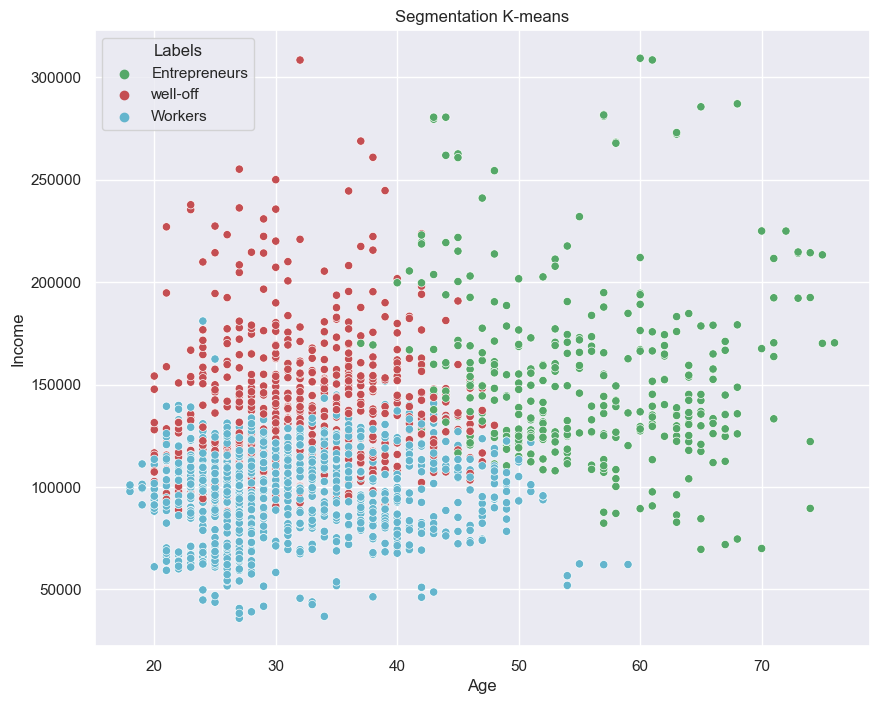

In [30]:
x_axis = df_seg_kmeans['Age']
y_axis = df_seg_kmeans['Income']
plt.figure(figsize = (10, 8))
ssn.scatterplot(x=x_axis,y= y_axis, hue = df_seg_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

## PCA

> Principal Component Analysis, convert set of correlated variables to uncoorelated variables through orthogonal transformation

In [31]:
pca = PCA()
pca.fit(scaled_segmentation_df)

PCA()

In [32]:
pca.explained_variance_ratio_

array([0.45071403, 0.2518607 , 0.12431802, 0.09203774, 0.03798222,
       0.02811108, 0.01497622])

Text(0, 0.5, 'Cumulative Explained Variance')

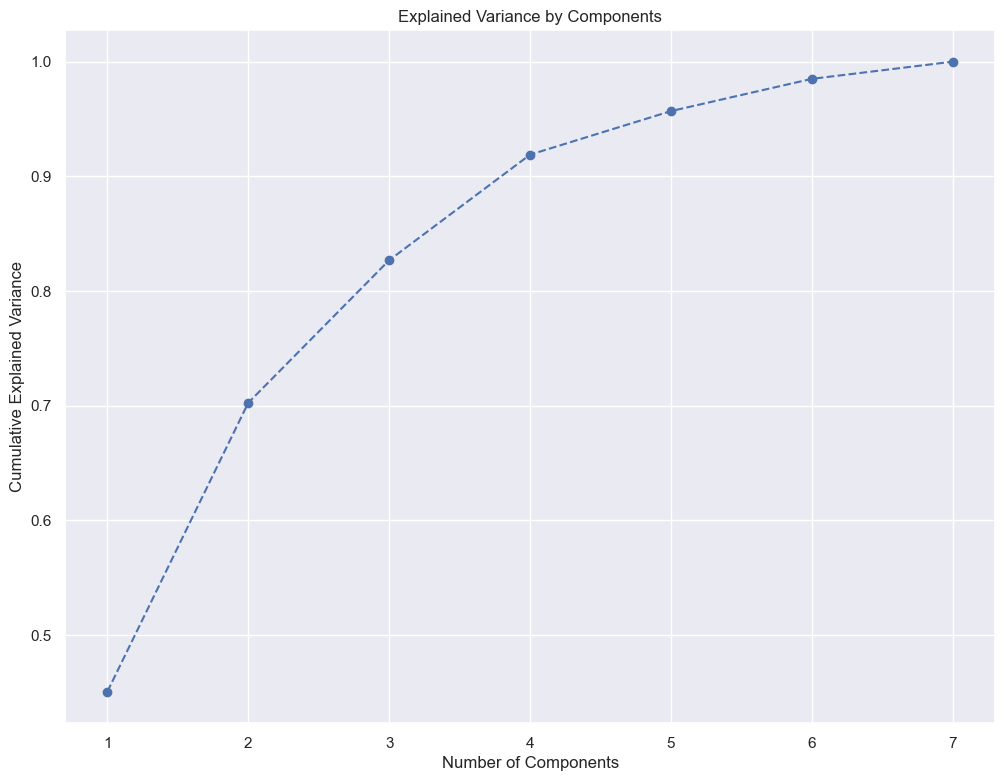

In [33]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [34]:
# 4 components can account for more than 90% of variance and slope reduces drastically after 4.

pca = PCA(n_components = 4)
pca.fit(scaled_segmentation_df)

PCA(n_components=4)

### PCA Results

In [35]:
pca.components_

array([[-0.11254574, -0.05833892,  0.4968568 ,  0.20395228,  0.66103914,
         0.32983372,  0.38691574],
       [ 0.07582877,  0.00572165,  0.72680511,  0.38133677, -0.26686774,
        -0.30644933, -0.39423887],
       [ 0.53521007,  0.59947397, -0.24029635,  0.39251245,  0.28247463,
         0.10703727, -0.22610593],
       [ 0.11327755,  0.27188471,  0.05468965,  0.274161  , -0.51489906,
        -0.01858166,  0.7547353 ]])

In [36]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = scaled_segmentation_df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.112546,-0.058339,0.496857,0.203952,0.661039,0.329834,0.386916
Component 2,0.075829,0.005722,0.726805,0.381337,-0.266868,-0.306449,-0.394239
Component 3,0.535210,0.599474,-0.240296,0.392512,0.282475,0.107037,-0.226106
Component 4,0.113278,0.271885,0.054690,0.274161,-0.514899,-0.018582,0.754735


([<matplotlib.axis.YTick at 0x210e9f99850>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

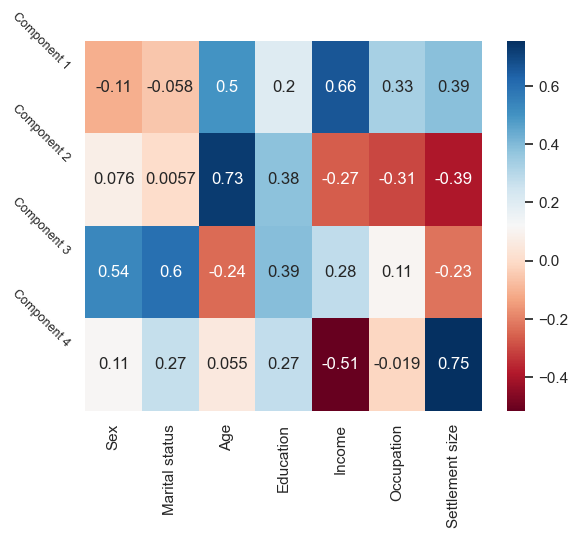

In [37]:
ssn.heatmap(df_pca_comp,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           ['Component 1', 'Component 2', 'Component 3','Component 4'],
           rotation = -45,
           fontsize = 9)

In [38]:
pca.transform(scaled_segmentation_df)

array([[ 2.20993834,  1.6767787 , -1.03957478,  1.12009469],
       [ 0.37969859, -1.59732116,  0.81904624,  0.66827369],
       [-0.47624578,  1.52216002, -0.98065214, -0.249745  ],
       ...,
       [-1.49227319,  0.04391631, -1.02483145, -0.56994943],
       [-1.55534263, -0.00845425,  0.73169707, -0.09963807],
       [-2.05874345, -0.20231075, -1.03511222, -0.35490832]])

In [39]:
scores_pca = pca.transform(scaled_segmentation_df)

### K-Means with PCA

In [40]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

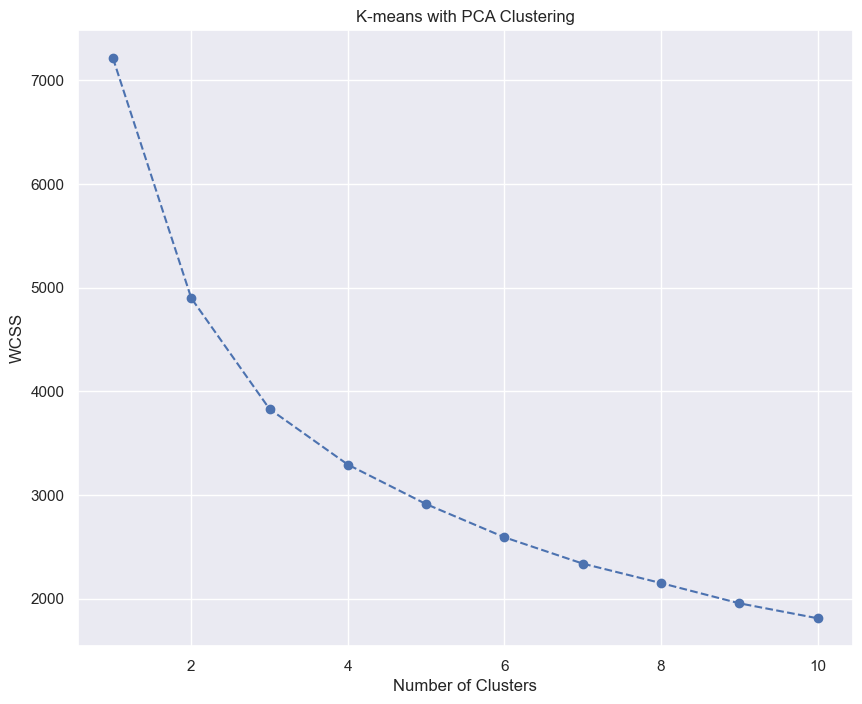

In [41]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [42]:
# Still elbow is at 3
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=2)

### K-Means clustering with PCA Results

In [43]:
seg_kmean_pca_df = pd.concat([segmentation_df.reset_index(drop = True),pd.DataFrame(scores_pca)],axis = 1)
seg_kmean_pca_df.columns.values[-4:] = ["Comp_1","Comp_2","Comp_3","Comp_4"]

seg_kmean_pca_df['Segment K-means PCA'] = kmeans_pca.labels_

seg_kmean_pca_df.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,Comp_4,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.209938,1.676779,-1.039575,1.120095,0
1,1,1,22,1,150773,1,2,0.379699,-1.597321,0.819046,0.668274,2
2,0,0,49,1,89210,0,0,-0.476246,1.522160,-0.980652,-0.249745,1


In [44]:
seg_kmean_pca_frq = seg_kmean_pca_df.groupby(['Segment K-means PCA']).mean()
seg_kmean_pca_frq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,Comp_4
Segment K-means PCA,,,,,,,,,,,
0,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977,1.789275,1.054446,0.045866,0.067210
1,0.636458,0.568750,31.571875,0.919792,97056.497917,0.422917,0.092708,-1.024982,0.240862,0.109374,-0.170285
2,0.255814,0.405523,31.979651,0.808140,137192.504360,1.210756,1.479651,0.514764,-0.875571,-0.176081,0.203221


In [45]:
seg_kmean_pca_frq['N Obs'] = seg_kmean_pca_df[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
seg_kmean_pca_frq['Prop Obs'] = seg_kmean_pca_frq['N Obs'] / seg_kmean_pca_frq['N Obs'].sum()
seg_kmean_pca_frq = seg_kmean_pca_frq.rename({0:'Entrepreneurs',
                                              1:'well-off',
                                              2:'Workers'})

seg_kmean_pca_frq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,Comp_4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
Entrepreneurs,0.360795,0.477273,55.417614,1.809659,154392.491477,1.085227,1.053977,1.789275,1.054446,0.045866,0.067210,352,0.176
well-off,0.636458,0.568750,31.571875,0.919792,97056.497917,0.422917,0.092708,-1.024982,0.240862,0.109374,-0.170285,960,0.480
Workers,0.255814,0.405523,31.979651,0.808140,137192.504360,1.210756,1.479651,0.514764,-0.875571,-0.176081,0.203221,688,0.344


In [46]:
seg_kmean_pca_df['Legend'] = seg_kmean_pca_df['Segment K-means PCA'].map({0:'Entrepreneurs',
                                                                          1:'well-off',
                                                                          2:'Workers'})
seg_kmean_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,Comp_4,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.209938,1.676779,-1.039575,1.120095,0,Entrepreneurs
1,1,1,22,1,150773,1,2,0.379699,-1.597321,0.819046,0.668274,2,Workers
2,0,0,49,1,89210,0,0,-0.476246,1.522160,-0.980652,-0.249745,1,well-off
3,0,0,45,1,171565,1,1,1.499771,-0.003517,-0.407090,-0.645262,0,Entrepreneurs
4,0,0,53,1,149031,1,1,1.448050,0.650585,-0.738235,-0.303381,0,Entrepreneurs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.078225,1.233563,-0.150006,-0.609559,1,well-off
1996,1,1,27,1,117744,1,0,-0.755167,-0.267327,0.923829,-0.371482,1,well-off
1997,0,0,31,0,86400,0,0,-1.492273,0.043916,-1.024831,-0.569949,1,well-off
1998,1,1,24,1,97968,0,0,-1.555343,-0.008454,0.731697,-0.099638,1,well-off


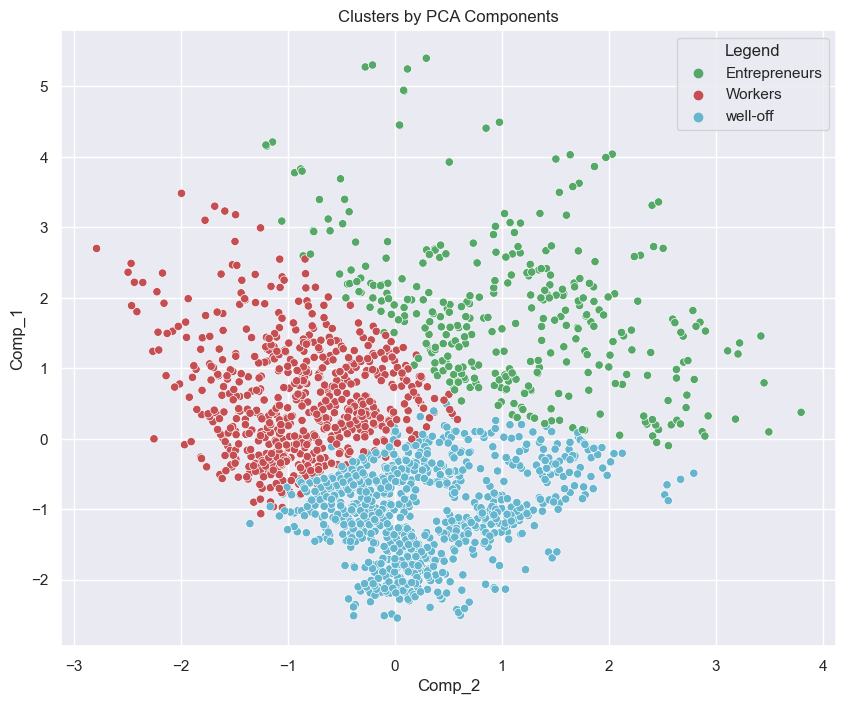

In [47]:
# PLot PCA components 

x_axis = seg_kmean_pca_df['Comp_2']
y_axis = seg_kmean_pca_df['Comp_1']
plt.figure(figsize = (10, 8))
ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

> Reducing Components from 7 to 4 improved clustering <br>
> Just using 2 components shows almost completely distinct clusters<br>
> FYI Comp_1 and comp_2 defines over 70% of variance (from Explained variance by component plot)

> Now Plotting all Component pairs to show estimates of how much variance each pair defines

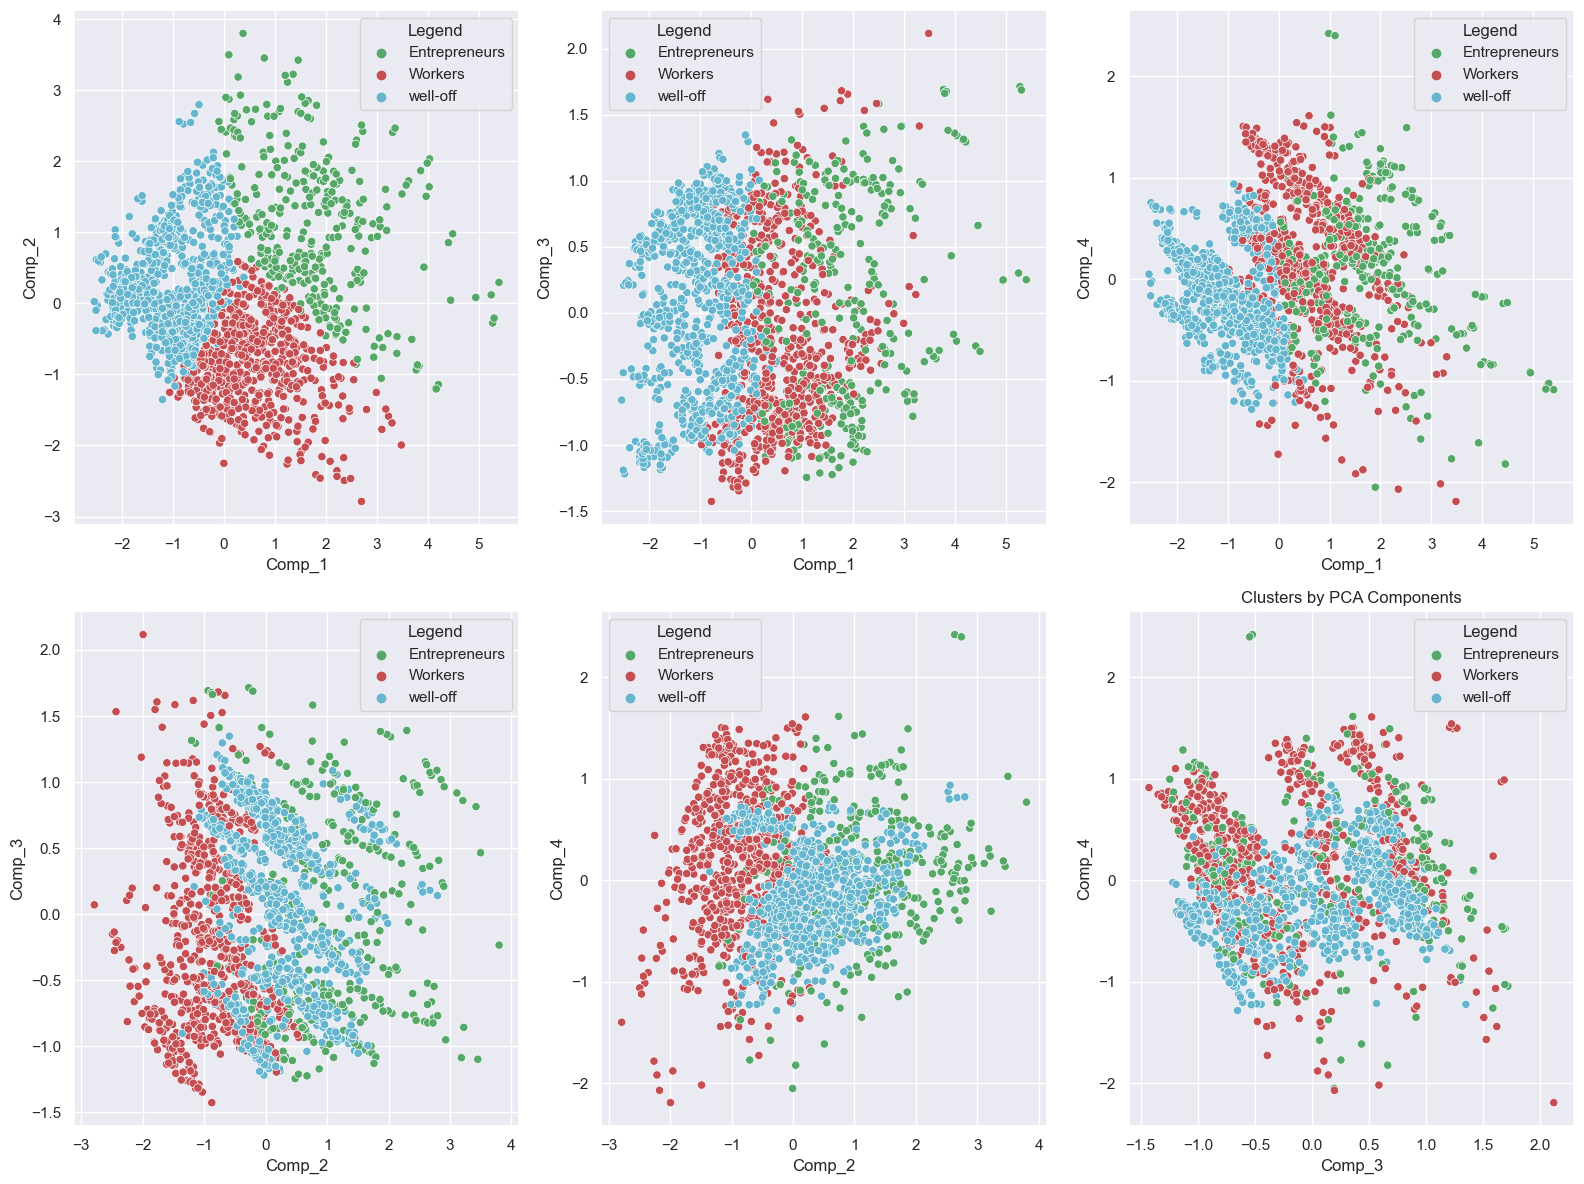

In [48]:
column_index = range(seg_kmean_pca_df.columns.get_loc("Comp_1"),seg_kmean_pca_df.columns.get_loc("Comp_4")+1)
fig, ax = plt.subplots(2,3,figsize=(16,12))
for i in column_index:
    j = i+1
    k = i
    while j<11:
            x_axis = seg_kmean_pca_df[seg_kmean_pca_df.columns[i]]
            y_axis = seg_kmean_pca_df[seg_kmean_pca_df.columns[j]]
            if i <9:
                ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend']
                                , palette = ['g', 'r', 'c'],ax=ax[k-column_index[0]][j-(i+1)])
                j+=1
            else :
                ssn.scatterplot(x=x_axis, y=y_axis, hue = seg_kmean_pca_df['Legend']
                            , palette = ['g', 'r', 'c'],ax=ax[k-column_index[1]][j-(i-1)])
                j+=1
            
            
plt.title('Clusters by PCA Components')
plt.tight_layout()
plt.show()

## Data Export

In [49]:
np.unique(kmeans_pca.labels_)

array([0, 1, 2])

## Descriptive Data Analysis

### Preprocessing

In [50]:
df_purchase = pd.read_csv("purchase data.csv")
df_purchase.head(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [51]:
df_purchase.columns.to_frame()

,0
ID,ID
Day,Day
Incidence,Incidence
Brand,Brand
Quantity,Quantity
Last_Inc_Brand,Last_Inc_Brand
Last_Inc_Quantity,Last_Inc_Quantity
Price_1,Price_1
Price_2,Price_2
Price_3,Price_3


### Import Segmetation models

In [52]:
temp = scalar.transform(df_purchase[['Age','Income']])
features = df_purchase[["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]]
features[['Age','Income']] = temp

In [53]:
df_purchase_segm_pca = pca.fit_transform(features)
df_purchase_segm_pca

array([[-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       [-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       [-0.01243232,  0.7204312 , -0.45935543, -0.56153629],
       ...,
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902],
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902],
       [-0.05557839,  0.31350361, -0.31350249, -0.67808902]])

In [54]:
df_purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)
np.unique(df_purchase_segm_kmeans_pca)

array([0, 1, 2])

In [55]:
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = df_purchase_segm_kmeans_pca
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,1


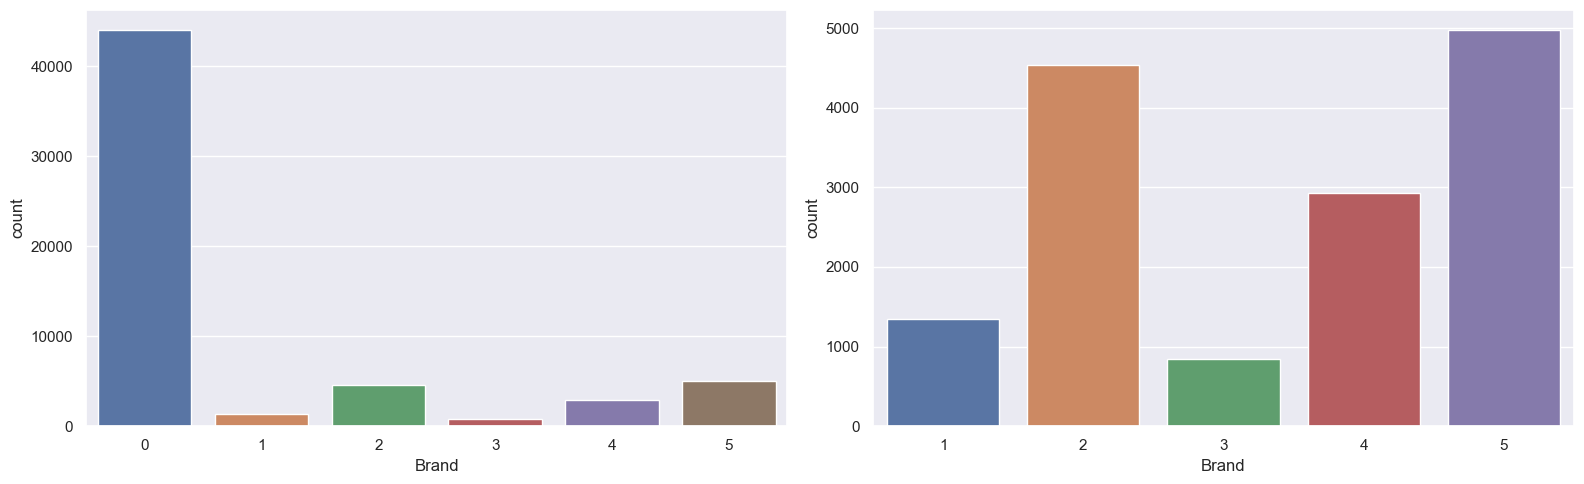

In [56]:
temp_df = pd.read_csv('purchase data.csv')
fig, ax = plt.subplots(1,2,figsize=(16,5))

ssn.countplot(temp_df["Brand"],ax=ax[0]);

temp_df = temp_df[temp_df["Brand"]!=0]
ssn.countplot(temp_df["Brand"],ax=ax[1]);

plt.tight_layout()
plt.show();

### Analysis by Segments

In [57]:
df_purchase_predictors.head(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [58]:
df_purchase["Incidence"].unique()

array([0, 1], dtype=int64)

In [59]:
# Purchase occasions by ID
temp1 = df_purchase[["ID","Incidence"]].groupby("ID").count()
temp1.rename(columns={'Incidence':'N_Visits'}, inplace=True)

In [60]:
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [61]:
len(df_purchase["ID"].unique())

500

In [62]:
# Number of purchases per ID

temp2 = df_purchase[["ID","Incidence"]].groupby("ID").sum()
temp2.rename(columns={'Incidence':'N_Purchases'}, inplace=True)
temp2['N_visits'] = temp1['N_Visits']
temp2

,N_Purchases,N_visits
ID,,
200000001,9,101
200000002,11,87
200000003,10,97
200000004,11,85
200000005,13,111
...,...,...
200000496,20,120
200000497,43,120
200000498,39,131


In [63]:
# Average No. of Purchases per customer
temp2['Avg_Purchases'] = temp2["N_Purchases"]/temp2["N_visits"]
temp2

,N_Purchases,N_visits,Avg_Purchases
ID,,,
200000001,9,101,0.089109
200000002,11,87,0.126437
200000003,10,97,0.103093
200000004,11,85,0.129412
200000005,13,111,0.117117
...,...,...,...
200000496,20,120,0.166667
200000497,43,120,0.358333
200000498,39,131,0.297710


In [64]:
# Segment of each customer 

temp3 = df_purchase_predictors[["ID","Segment"]].groupby(['ID']).mean()
df_purchase_descr = temp2.join(temp3)

df_purchase_descr.head(5)

,N_Purchases,N_visits,Avg_Purchases,Segment
ID,,,,
200000001,9,101,0.089109,1.0
200000002,11,87,0.126437,0.0
200000003,10,97,0.103093,1.0
200000004,11,85,0.129412,1.0
200000005,13,111,0.117117,2.0


In [65]:
df_purchase_descr['Segment'] = df_purchase_descr['Segment'].astype('int')
df_purchase_descr.head(5)

,N_Purchases,N_visits,Avg_Purchases,Segment
ID,,,,
200000001,9,101,0.089109,1
200000002,11,87,0.126437,0
200000003,10,97,0.103093,1
200000004,11,85,0.129412,1
200000005,13,111,0.117117,2


In [66]:
seg_prop = df_purchase_descr[['N_visits','Segment']].groupby(['Segment']).count()/df_purchase_descr['Segment'].count()
seg_prop.rename(columns={'N_visits':'Segment_prop'},inplace=True)
seg_prop 

,Segment_prop
Segment,
0,0.206
1,0.490
2,0.304


Text(0.5, 1.0, 'Segment Proportions')

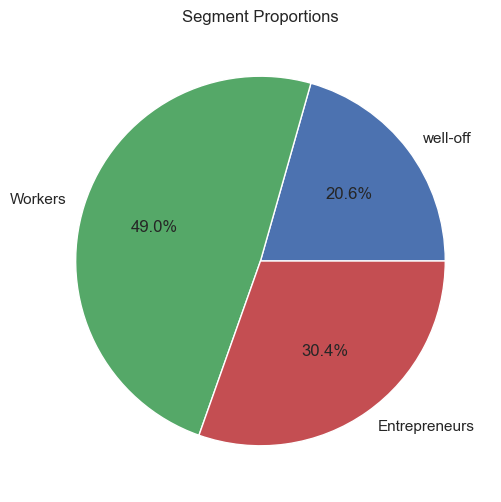

In [67]:
plt.figure(figsize = (9, 6))
plt.pie(seg_prop['Segment_prop'],
        labels = ['well-off','Workers','Entrepreneurs'],
        autopct = '%.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

In [68]:
seg_mean = df_purchase_descr.groupby(["Segment"]).mean()
seg_mean

,N_Purchases,N_visits,Avg_Purchases
Segment,,,
0,36.533981,119.631068,0.283581
1,22.857143,114.930612,0.200608
2,34.703947,119.822368,0.267619


In [69]:
seg_std = df_purchase_descr.groupby(["Segment"]).std()
seg_std

,N_Purchases,N_visits,Avg_Purchases
Segment,,,
0,37.727042,30.947454,0.178090
1,13.319836,17.606330,0.114163
2,41.579548,34.429716,0.186085


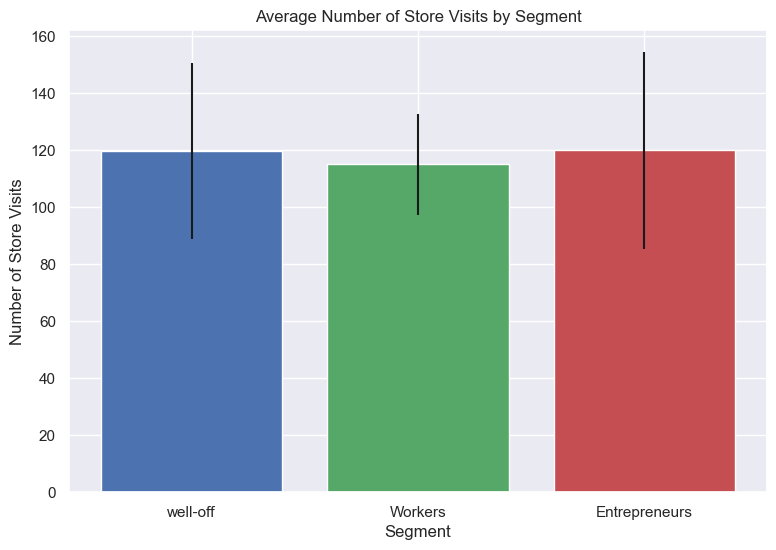

In [70]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2),
        tick_label = ('well-off','Workers','Entrepreneurs'), 
        height = seg_mean['N_visits'],
        yerr = seg_std['N_visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment');

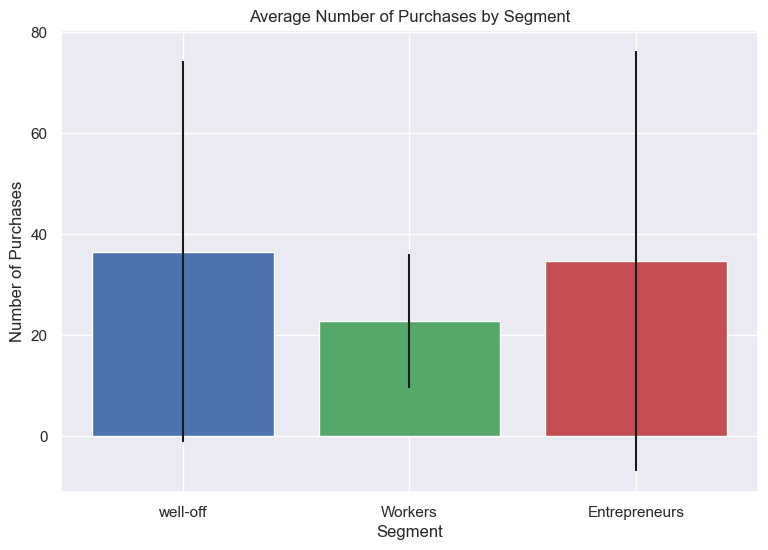

In [71]:
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2),
        tick_label = ('well-off','Workers','Entrepreneurs'), 
        height = seg_mean['N_Purchases'],
        yerr = seg_std['N_Purchases'],
        color = ('b', 'g', 'r'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Average Number of Purchases by Segment');

#### Comments on Analysis so far

> Although Half of customers falls under Entreprenure category this group<br> accounts for least number of purchases and visits to shop. And are most consistent in their behaviour.<br>

> Well-off and workers group show high variance in Purchases.<br>
> And On an average each group Purchase about 1.5X the Entreprenure despite consisting of only 50% of customers altogether.

### Brand Choice

#### Assuming Customer is in shop and has decided to make a purchase.

In [72]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,1


In [73]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [74]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,1.0
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,0.0
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,1.0
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,1.0
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,1.0
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,0.0
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,1.0


> On an average Which brand is preferred by each segment

In [75]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.045970,0.180088,0.027482,0.520045,0.226416
1.0,0.163670,0.586834,0.068260,0.067780,0.113456
2.0,0.126073,0.229721,0.052071,0.132146,0.459990


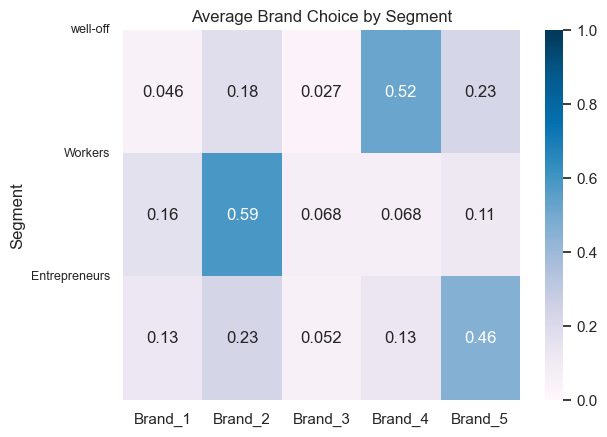

In [76]:
ssn.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2], ['well-off','Workers','Entrepreneurs'], rotation = 0, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

<h4>Comments on Analysis so far </h4>

> Entrepreneurs :   Prefer Brand_2 possible substitute Brand_1<br>
> well-off      :   Prefer Brand_5 possible substitute Brand_2 <br>
> Workers       :   Prefer Brand_4 possible substitute Brand_5 

possible substitute : SECOND Preference

### Revenue

In [77]:
df_purchase_predictors[['Price_1','Promotion_1']]

,Price_1,Promotion_1
0,1.59,0
1,1.51,0
2,1.51,0
3,1.52,0
4,1.52,0
...,...,...
58688,1.41,0
58689,1.36,0
58690,1.50,0
58691,1.51,0


In [78]:
#temp['Revenue Brand 1']

In [79]:
# Determine which Segment is respomsible for max Revenue for each brand

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,765.00
1,1,3720.73
2,2,1819.92


In [80]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,765.00,2213.12,723.84,12529.32,7942.70
1,1,3720.73,15546.89,3775.28,2389.65,3541.54
2,2,1819.92,4008.30,1522.40,4121.13,18136.76


In [81]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,765.00,2213.12,723.84,12529.32,7942.70,24173.98
1,1,3720.73,15546.89,3775.28,2389.65,3541.54,28974.09
2,2,1819.92,4008.30,1522.40,4121.13,18136.76,29608.51


In [82]:
seg_prop

,Segment_prop
Segment,
0,0.206
1,0.490
2,0.304


In [83]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = seg_prop['Segment_prop']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({2:'Entrepreneurs',
                                                                           0:'well-off',
                                                                           1:'Workers'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
well-off,765.00,2213.12,723.84,12529.32,7942.70,24173.98,0.206
Workers,3720.73,15546.89,3775.28,2389.65,3541.54,28974.09,0.490
Entrepreneurs,1819.92,4008.30,1522.40,4121.13,18136.76,29608.51,0.304


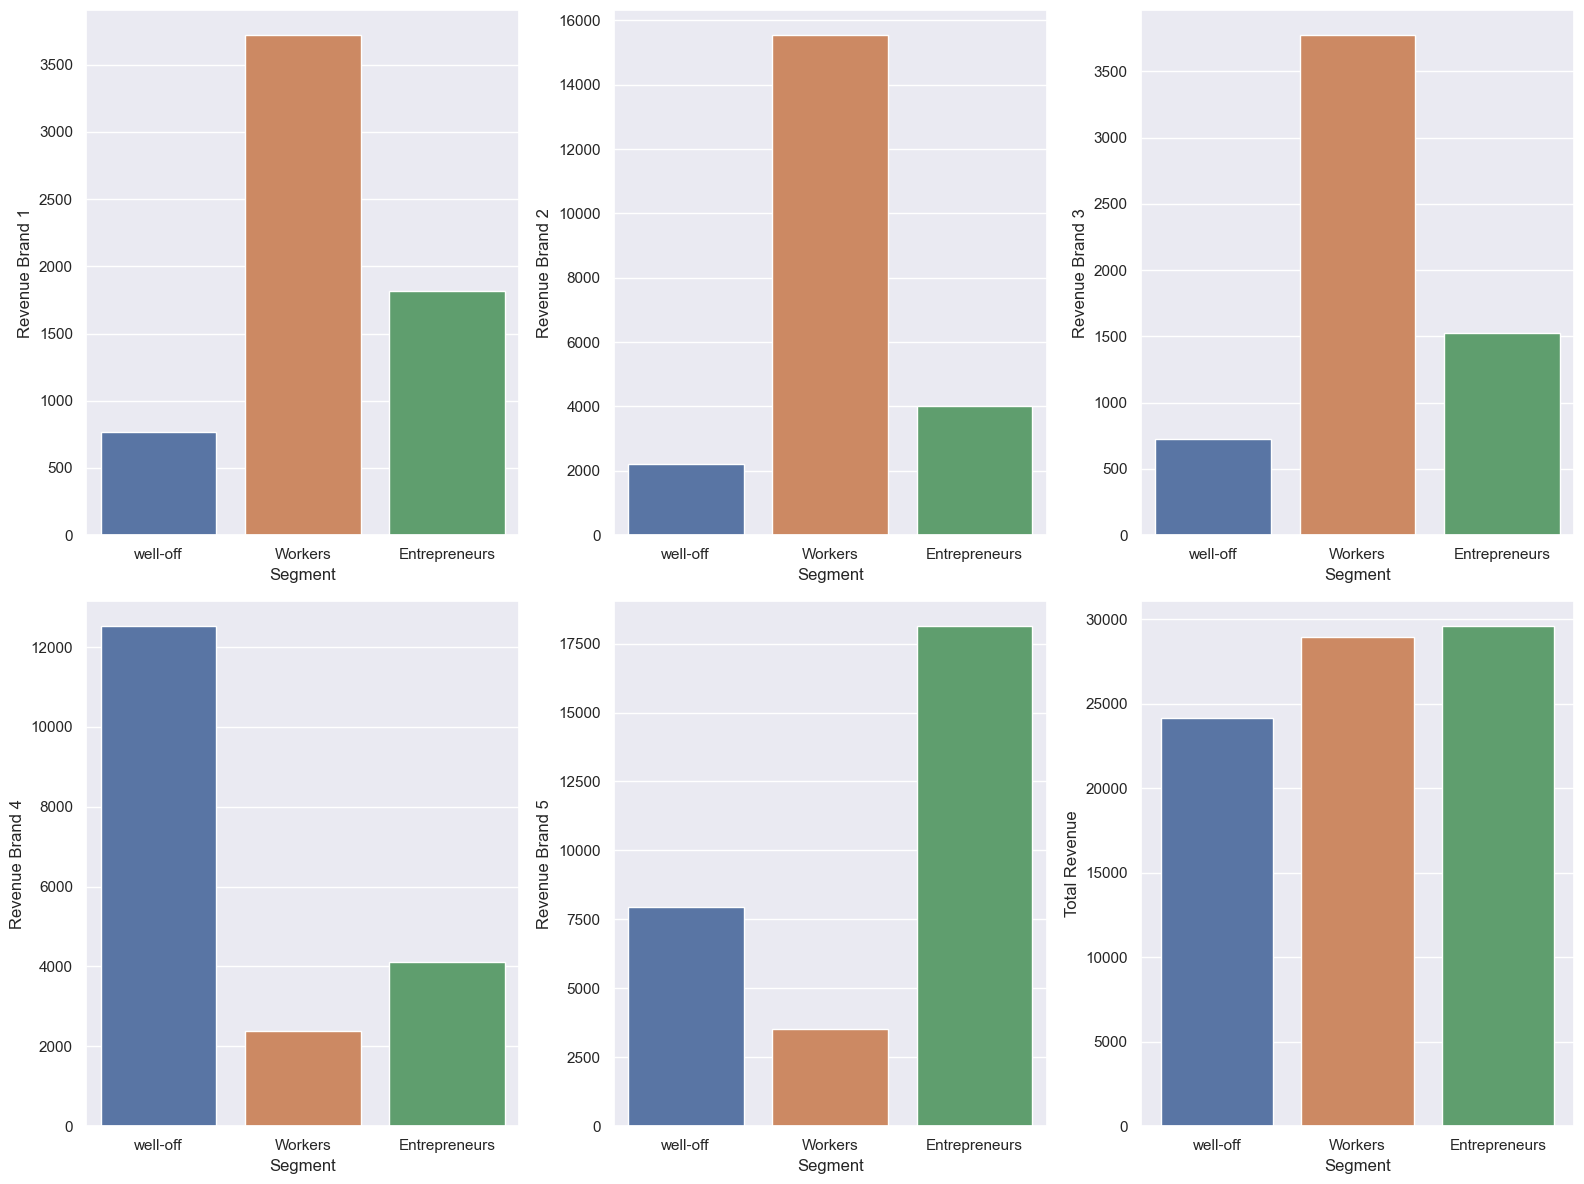

In [84]:
hue = segments_brand_revenue.index
fig, ax = plt.subplots(2,3,figsize=(16,12))
j = 0
k = 0
l = 0
columns = ["Revenue Brand 1","Revenue Brand 2","Revenue Brand 3","Revenue Brand 4","Revenue Brand 5","Total Revenue"]
for i in columns:
    if k<3:
        ssn.barplot(x = segments_brand_revenue.index, y = segments_brand_revenue[i], ax=ax[j][k])
        k+=1
    else:
        j = 1
        ssn.barplot(x = segments_brand_revenue.index, y = segments_brand_revenue[i], ax=ax[j][l])
        l+=1

fig.tight_layout()
plt.plot();

#### Comments on Analysis so far

> Each group accounts max Revenue for their preferred Brand

> Max Revenue proportion for Brand_1 and Brand_3 comes from Entrepreneurs group

> Well-off segment accounts for most overall revenue